In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

2022-04-22 15:26:10.863908: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-22 15:26:10.863947: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
generator = keras.models.load_model('datas/weights/animaldc/generator.h5')
latent_dim = generator.input.shape[1]
print(f"Generator model loaded with latent dim: {latent_dim}")

2022-04-22 15:26:13.367660: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-22 15:26:13.367694: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-22 15:26:13.367720: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Inspiron-5558): /proc/driver/nvidia/version does not exist
2022-04-22 15:26:13.367979: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Generator model loaded with latent dim: 100


In [3]:
# Saját modell az inception v3 alapjaira (Transfer learning)
# (64, 64, 3)-as képeket vár bemenetként, majd one-hot encoding alapján adja ki a classokat (3 class)
# nem logits kimenetű
inception_model = keras.models.load_model('datas/animalFacesClassifier.h5')

In [4]:
# Gradient Descent with momentum
cross_entropy = keras.losses.CategoricalCrossentropy(from_logits=False)

def gradient_descent_momentum(goal_label, starting_noise, step_size, momentum, steps, verbose=False):
    noise = tf.Variable(starting_noise, name='noise')
    
    result_noises = []
    losses = []
    preds = []
    
    change = 0
    for i in range(steps):
        with tf.GradientTape() as g_tape:
            g_tape.watch(noise)

            generated_image = generator(noise, training=False)
            
            predictions = inception_model(generated_image)
            
            loss = cross_entropy(goal_label, predictions[0])

        gradients = g_tape.gradient(loss, noise)
        change = (step_size * gradients) + momentum * change
        noise = noise - change

        if(verbose):
            print(predictions)
            print(f"Step: {i}, Loss: {loss}")
            plt.imshow((generated_image[0].numpy()*127.5+127.5).astype("uint8"), interpolation="none")
            plt.show()

        result_noises.append(noise)
        preds.append(predictions[0])
        losses.append(loss)
    return result_noises, losses, preds

In [5]:
def make_onehot_from_dict(input_data):
    return [input_data['cat'], input_data['dog'], input_data['wild']]

tf.Tensor([[0.24492285 0.7338426  0.02123448]], shape=(1, 3), dtype=float32)
Step: 0, Loss: 1.4068119525909424


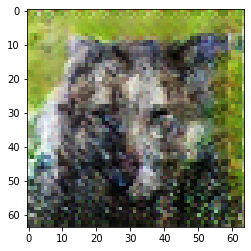

tf.Tensor([[0.24092591 0.6841462  0.07492792]], shape=(1, 3), dtype=float32)
Step: 1, Loss: 1.423265814781189


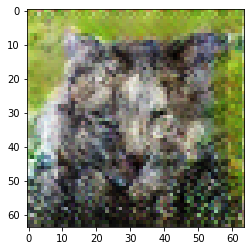

tf.Tensor([[0.11890503 0.0695439  0.81155115]], shape=(1, 3), dtype=float32)
Step: 2, Loss: 2.1294302940368652


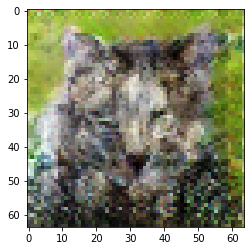

tf.Tensor([[0.19924039 0.6227516  0.178008  ]], shape=(1, 3), dtype=float32)
Step: 3, Loss: 1.6132432222366333


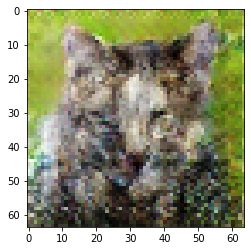

tf.Tensor([[0.93418735 0.02318965 0.0426231 ]], shape=(1, 3), dtype=float32)
Step: 4, Loss: 0.06807839870452881


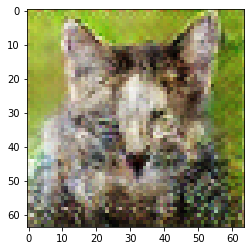

tf.Tensor([[0.8155381  0.04690428 0.13755766]], shape=(1, 3), dtype=float32)
Step: 5, Loss: 0.20390713214874268


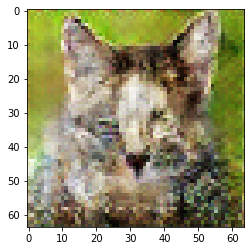

tf.Tensor([[0.96428484 0.01356522 0.02214989]], shape=(1, 3), dtype=float32)
Step: 6, Loss: 0.03636849299073219


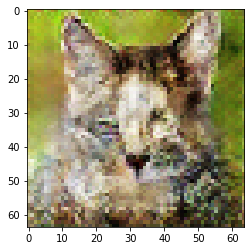

tf.Tensor([[0.8346005  0.03141642 0.13398312]], shape=(1, 3), dtype=float32)
Step: 7, Loss: 0.1808021068572998


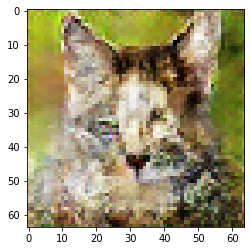

tf.Tensor([[0.9781989  0.0015423  0.02025889]], shape=(1, 3), dtype=float32)
Step: 8, Loss: 0.022042391821742058


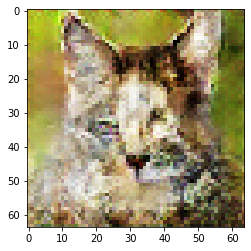

tf.Tensor([[0.8752776  0.00676634 0.11795606]], shape=(1, 3), dtype=float32)
Step: 9, Loss: 0.13321414589881897


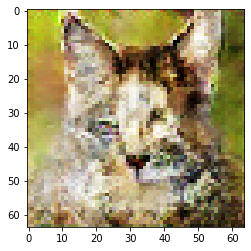

tf.Tensor([[0.09762915 0.00101442 0.90135646]], shape=(1, 3), dtype=float32)
Step: 10, Loss: 2.3265790939331055


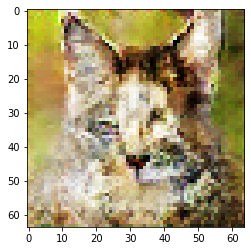

tf.Tensor([[0.87484884 0.00118078 0.12397037]], shape=(1, 3), dtype=float32)
Step: 11, Loss: 0.13370415568351746


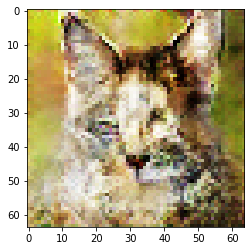

tf.Tensor([[0.9058501  0.02505874 0.06909108]], shape=(1, 3), dtype=float32)
Step: 12, Loss: 0.09888135641813278


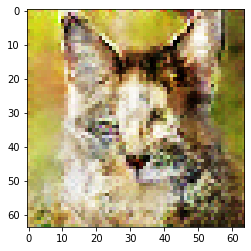

tf.Tensor([[0.59061205 0.11674755 0.29264048]], shape=(1, 3), dtype=float32)
Step: 13, Loss: 0.5265960097312927


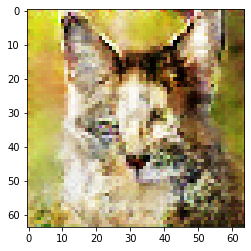

tf.Tensor([[0.70125335 0.00413519 0.29461148]], shape=(1, 3), dtype=float32)
Step: 14, Loss: 0.3548860251903534


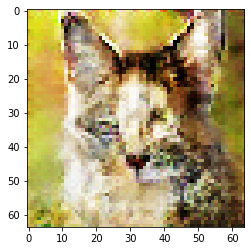

tf.Tensor([[0.78484577 0.00093579 0.21421844]], shape=(1, 3), dtype=float32)
Step: 15, Loss: 0.24226805567741394


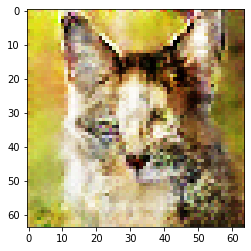

tf.Tensor([[0.5756335  0.24865179 0.17571467]], shape=(1, 3), dtype=float32)
Step: 16, Loss: 0.5522840619087219


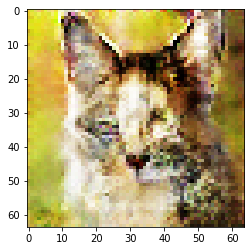

tf.Tensor([[0.28677195 0.5368127  0.17641523]], shape=(1, 3), dtype=float32)
Step: 17, Loss: 1.2490679025650024


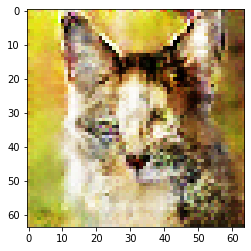

tf.Tensor([[0.9417629  0.0043173  0.05391975]], shape=(1, 3), dtype=float32)
Step: 18, Loss: 0.06000164523720741


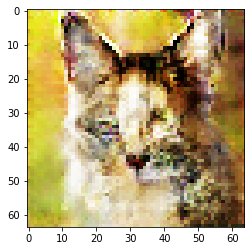

tf.Tensor([[0.99087965 0.00112545 0.00799491]], shape=(1, 3), dtype=float32)
Step: 19, Loss: 0.00916219037026167


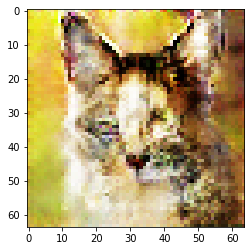

tf.Tensor([[0.97515297 0.00396778 0.02087926]], shape=(1, 3), dtype=float32)
Step: 20, Loss: 0.025160929188132286


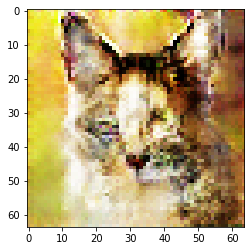

tf.Tensor(0.02516093, shape=(), dtype=float32)


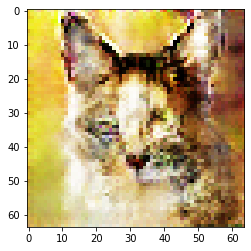

In [19]:
# TODO: a keresést egyszerre több elemre végezni, hogy ne egymás után kelljen

# Strukturált adat
input_data = {
    "cat": 1.0,
    "dog": 0.0,
    "wild": 0.0
}

# Visszakeresés a valószínűségi értékek alapján
goal_prediction = make_onehot_from_dict(input_data)

#starting_noise = tf.random.uniform([1, latent_dim], minval=-1.5, maxval=1.5)
starting_noise = tf.random.normal([1, latent_dim])
#starting_noise = tf.random.truncated_normal([1, latent_dim])
#starting_noise = result_noises[-1]
step_size = 0.05
momentum = 0.9

n_steps = 21

result_noises, losses, preds =\
    gradient_descent_momentum(goal_prediction, starting_noise, step_size, momentum, n_steps, verbose=True)

print(losses[-1])
generated_image = generator(result_noises[-1], training=False)
plt.imshow((generated_image[0].numpy()*127.5+127.5).astype("uint8"), interpolation="none")
plt.show()

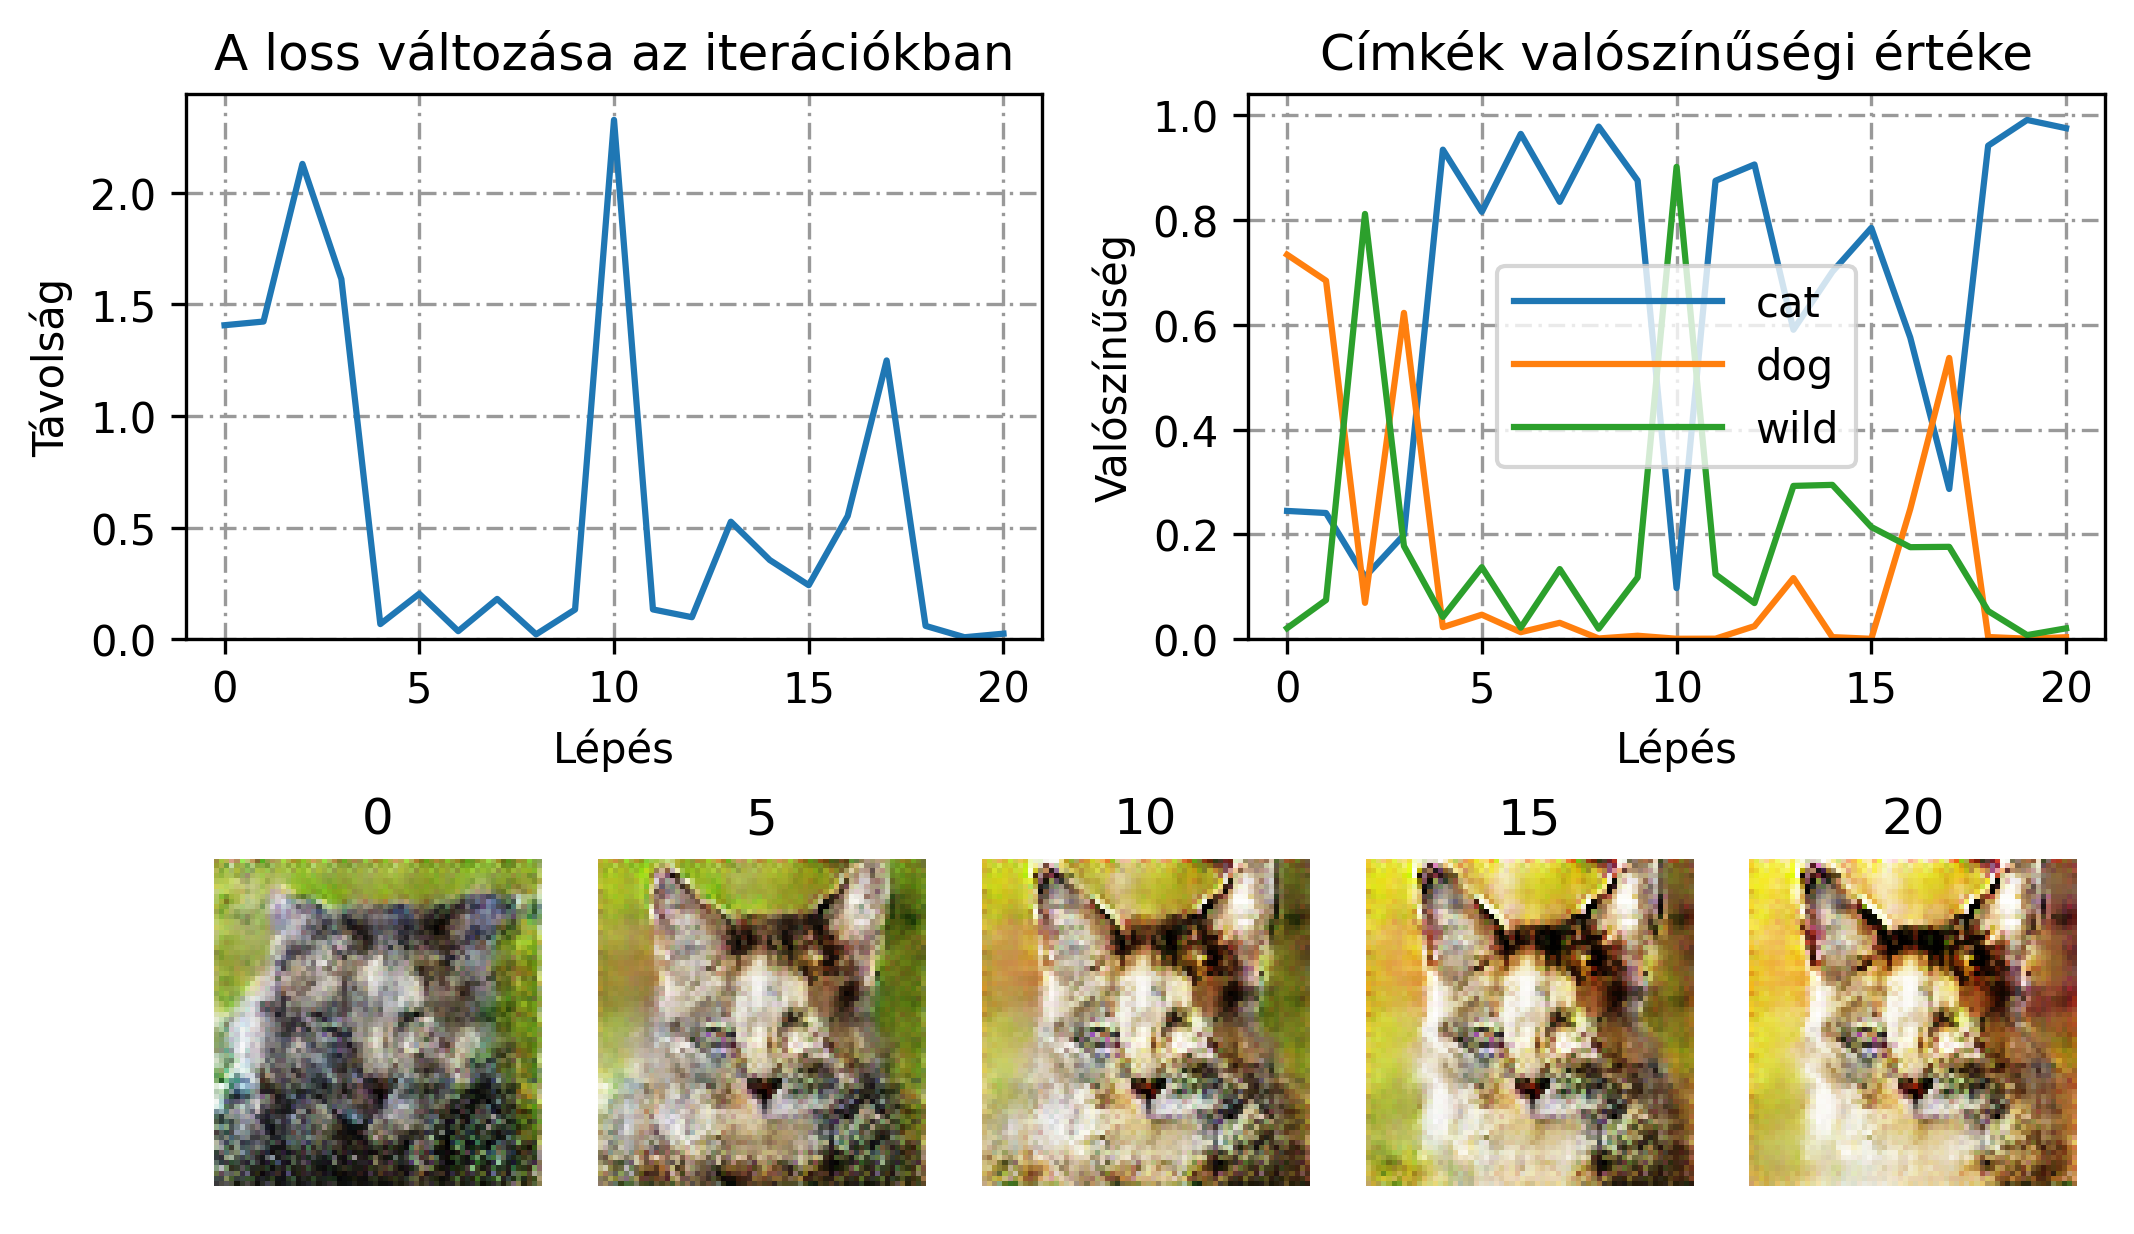

In [21]:
fig = plt.figure(figsize=(7, 4), dpi=300, constrained_layout=True)
axs = fig.subplot_mosaic([['Losses', 'Classes'],['Images', 'Images']],
                          gridspec_kw={'width_ratios':[2, 2], 'height_ratios':[1.5,1]})
axs['Losses'].set_xlabel('Lépés')
axs['Losses'].set_ylabel('Távolság')
axs['Losses'].set_title('A loss változása az iterációkban')
axs['Losses'].grid(True, color='0.6', dashes=(5, 2, 1, 2))
axs['Losses'].plot(losses)
axs['Losses'].set_ylim(bottom=0)

axs['Classes'].set_ylabel('Valószínűség')
axs['Classes'].set_xlabel('Lépés')
axs['Classes'].set_title('Címkék valószínűségi értéke')

axs['Classes'].grid(True, color='0.6', dashes=(5, 2, 1, 2))

axs['Classes'].plot(preds, label=['cat', 'dog', 'wild'])

axs['Classes'].set_ylim(bottom=0)
axs['Classes'].legend(loc=0, handlelength=5)

inserted = []
axs['Images'].axis('off')
pad = 0.01
inserted.append(axs['Images'].inset_axes([0.0, 0.05, 0.2, 0.9]))
inserted.append(axs['Images'].inset_axes([0.2, 0.05, 0.2, 0.9]))
inserted.append(axs['Images'].inset_axes([0.4, 0.05, 0.2, 0.9]))
inserted.append(axs['Images'].inset_axes([0.6, 0.05, 0.2, 0.9]))
inserted.append(axs['Images'].inset_axes([0.8, 0.05, 0.2, 0.9]))

selected_noises = result_noises[::5]
for i in range(5):
    generated_image = generator(selected_noises[i], training=False)
    inserted[i].axis('off')
    inserted[i].set_title(i*5)
    inserted[i].imshow((generated_image[0].numpy()*127.5+127.5).astype("uint8"), interpolation="none")
plt.show()

In [12]:
# Egy kutya és egy macska keresése, majd interpoláció a kettő között:

dog_label = [0, 1, 0]
cat_label = [1, 0, 0]

starting_noise = tf.random.normal([1, latent_dim])
dog_noise, _, _ =\
        gradient_descent_momentum(dog_label, starting_noise, 0.1, 0.5, 20, verbose=False)

starting_noise = tf.random.normal([1, latent_dim])
cat_noise, _, _ =\
        gradient_descent_momentum(cat_label, starting_noise, 0.1, 0.5, 20, verbose=False)

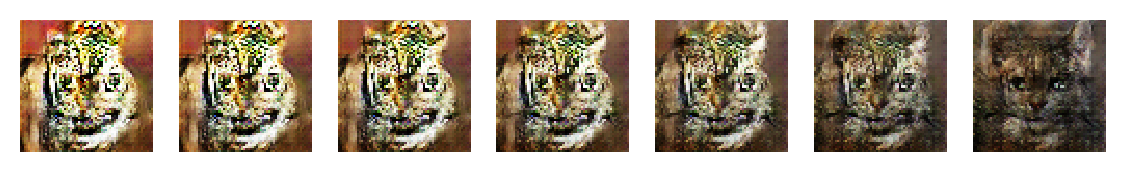

In [13]:
from scipy.interpolate import interp1d
import numpy as np

step_size = 8
linfit = interp1d([1, step_size], np.vstack([dog_noise[-1], cat_noise[-1]]), axis=0)

res = []
for j in range(1,step_size):
    generated_image = generator(linfit(j).reshape(1, latent_dim), training=False)
    res.append(generated_image)
        
fig, axes = plt.subplots(figsize=(len(res), 1), nrows=1, ncols=len(res), dpi=200)
for i in range(len(res)):
    gen_1 = res[i][0].numpy()*127.5+127.5
    axes[i].axis('off')
    axes[i].imshow((gen_1).astype("uint8"), interpolation='none')
plt.show()

2022-04-22 15:27:46.733205: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


0.03659208 0.9622265 0.0011813372


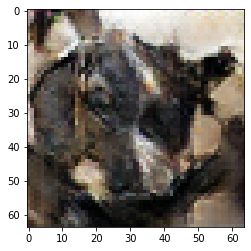

In [10]:
pon = 3

plt.imshow((res[pon][0].numpy()*127.5+127.5).astype("uint"))

result = inception_model.predict(res[pon])
print(result[0][0], result[0][1], result[0][2])

tf.Tensor([[0.31364807 0.00320612 0.68314576]], shape=(1, 3), dtype=float32)
Step: 0, Loss: 1.0037963390350342


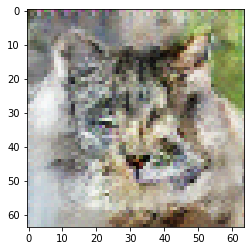

tf.Tensor([[0.59630215 0.00066153 0.40303636]], shape=(1, 3), dtype=float32)
Step: 1, Loss: 0.5953519344329834


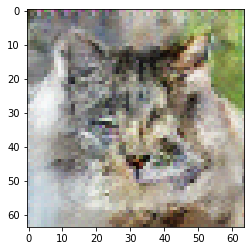

tf.Tensor([[9.9904424e-01 9.6570337e-05 8.5920154e-04]], shape=(1, 3), dtype=float32)
Step: 2, Loss: 1.4126663208007812


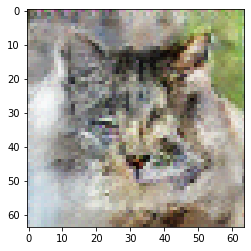

tf.Tensor([[0.81453645 0.04358649 0.14187703]], shape=(1, 3), dtype=float32)
Step: 3, Loss: 0.5546678304672241


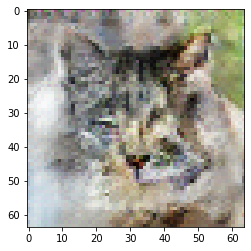

tf.Tensor([[0.7516686  0.01502372 0.23330773]], shape=(1, 3), dtype=float32)
Step: 4, Loss: 0.5194472074508667


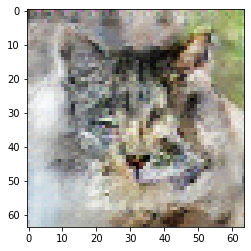

tf.Tensor([[0.5402078  0.00878716 0.451005  ]], shape=(1, 3), dtype=float32)
Step: 5, Loss: 0.6518964767456055


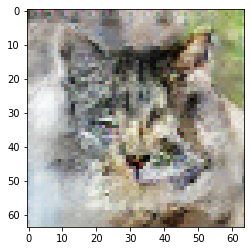

tf.Tensor([[0.89597976 0.04991635 0.05410381]], shape=(1, 3), dtype=float32)
Step: 6, Loss: 0.6712400317192078


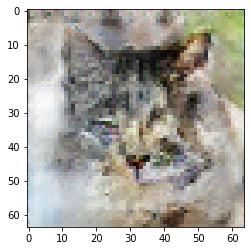

tf.Tensor([[0.96017957 0.00302906 0.03679138]], shape=(1, 3), dtype=float32)
Step: 7, Loss: 0.6930062770843506


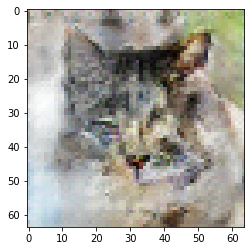

tf.Tensor([[0.7600082  0.01679705 0.22319472]], shape=(1, 3), dtype=float32)
Step: 8, Loss: 0.5194829702377319


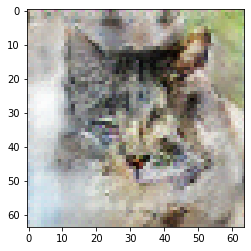

tf.Tensor([[0.8930117  0.03158784 0.07540048]], shape=(1, 3), dtype=float32)
Step: 9, Loss: 0.6075128316879272


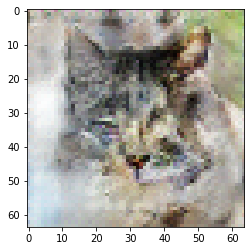

tf.Tensor([[0.78918666 0.04543719 0.16537617]], shape=(1, 3), dtype=float32)
Step: 10, Loss: 0.5493084192276001


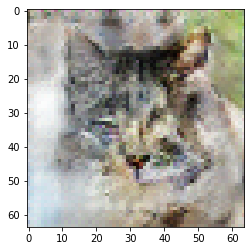

tf.Tensor([[0.7197886  0.03405525 0.24615608]], shape=(1, 3), dtype=float32)
Step: 11, Loss: 0.54339599609375


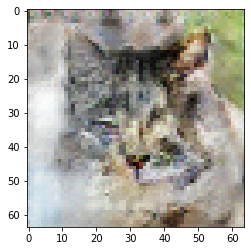

tf.Tensor([[0.86399233 0.01415882 0.12184878]], shape=(1, 3), dtype=float32)
Step: 12, Loss: 0.537947952747345


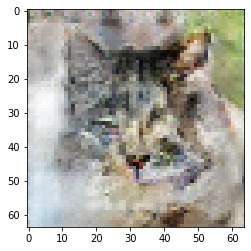

tf.Tensor([[0.61509305 0.04450564 0.34040132]], shape=(1, 3), dtype=float32)
Step: 13, Loss: 0.6043114066123962


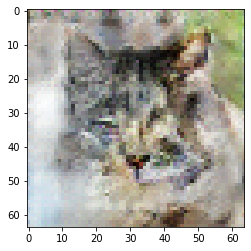

tf.Tensor([[0.9017191  0.00125638 0.09702447]], shape=(1, 3), dtype=float32)
Step: 14, Loss: 0.5493202209472656


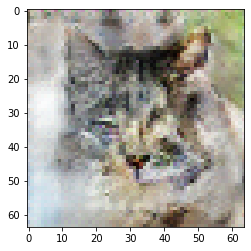

tf.Tensor([[0.57744986 0.01643045 0.40611976]], shape=(1, 3), dtype=float32)
Step: 15, Loss: 0.6195284128189087


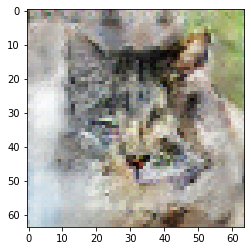

tf.Tensor([[0.6396175  0.06511773 0.29526466]], shape=(1, 3), dtype=float32)
Step: 16, Loss: 0.6014845371246338


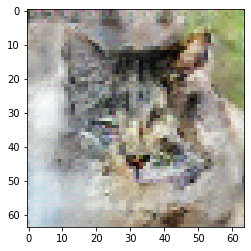

tf.Tensor([[9.9431795e-01 2.0029955e-04 5.4816906e-03]], shape=(1, 3), dtype=float32)
Step: 17, Loss: 1.0458269119262695


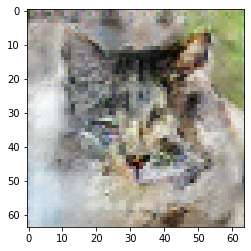

tf.Tensor([[0.7131531 0.0041688 0.2826781]], shape=(1, 3), dtype=float32)
Step: 18, Loss: 0.5231366157531738


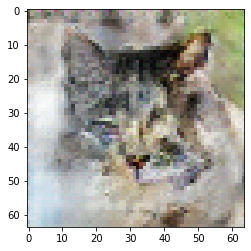

tf.Tensor([[0.91794306 0.00183374 0.08022314]], shape=(1, 3), dtype=float32)
Step: 19, Loss: 0.5730845332145691


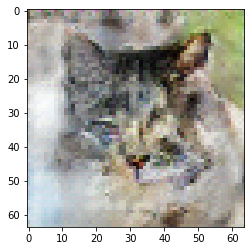

In [11]:
# Mixelt label-ök súly szerint

mixed_label = [0.8, 0.0, 0.2]

starting_noise = tf.random.uniform([1, latent_dim], minval=-2, maxval=2)
mixed_noise, _, _ =\
        gradient_descent_momentum(mixed_label, starting_noise, 0.1, 0.5, 20, verbose=True)